Привет! Меня зовут Валерий Гриднев, я провожу ревью твоей работы. Предлагаю общаться на «ты», если не против.

В работе ты увидишь комментарии, помеченные разным цветом.

<div class="alert alert-success">
Зеленым цветом помечены оброзцовые решения. Которые можно использовать в дальнейшем.
</div>

<div class="alert alert-warning">
Желтым цветом отмечено то, что ты можешь улучшить или доработать. Можешь учесть это при выполнении следующих работ или доработать проект сейчас, но это не обязательно.
</div>

<div class="alert alert-danger">
Красным цветом помечены моменты, которые необходимо доработать, чтобы проект был принят. Уверен, что у тебя все получится. Буду ждать твою работу на повторное ревью. 
</div>

Будет комфортнее работать над проектом вместе, если ты будешь **писать об изменениях** в проекте по моим рекомендациям. Для этого выбери для своих комментариев 

<div class="alert alert-block alert-info">заметный цвет</div>

Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
___

<div class="alert alert-block alert-info">Комментарии студента: Привет, Валерий. Я абсолютно не против общаться на ты.     
Нашел только один красный комментарий по поводу отрицательных значений __sMAPE__, исправил поменяв в greater_is_better= False на True.    
    Больше не увидел отмеченных проблем. 
    
</div>


 [Ссылка на изменения](#9)

# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

Данные находятся в трёх файлах:    
__gold_recovery_train.csv__ — обучающая выборка Скачать датасет;    
__gold_recovery_test.csv__ — тестовая выборка Скачать датасет;    
__gold_recovery_full.csv__ — исходные данные Скачать датасет.    
Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.   
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.   
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.      
В вашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверьте по нашей инструкции их на корректность.    

# План проекта <a name="8"></a> 

[1. Подготовка данных.](#1) 

[Вывод по первому этапу](#2)

[2. Анализ данных.](#3)

[Вывод по второму этапу](#4)

[3. Модель](#5)

[Вывод по третьему этапу](#6)

[Общий вывод](#7)

# 1. Подготовка данных<a name="1"></a> 

На этапе подготовки сделаем следующее:   

Откроем файлы и изучим их;   
Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака    __rougher.output.recovery__ и найдем MAE между нашими расчётами и значением признака;   
Проанализируем признаки, недоступные в тестовой выборке. Узнаем, что это за параметры и к какому типу относятся?   
Проведем предобработку данных.   

In [1]:
#импортируем нужные нам библиотеки
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn import ensemble
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputRegressor
from sklearn.dummy import DummyRegressor
import joblib

pd.set_option('display.max_columns', 100)

# 1.1 Изучение имеющихся файлов

In [2]:

gr_train = pd.read_csv('/datasets/gold_recovery_train.csv')
gr_test = pd.read_csv('/datasets/gold_recovery_test.csv')
gr_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
#Создадим функцию подсчета количества пропущенных значений в столбцах и применим ее к каждой выборке.
def miss_inf(data):
    shape_data = data.shape
    miss_data = (data.isnull().sum()/data.shape[0]*100).sort_values(ascending = False).head(15)
    print('Количество строк, столбцов:', shape_data)
    print()
    print('Доля пропущенных значений в столбцах (топ-15):')
    print(miss_data)

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Сразу плюс, за написание функции, пусть даже простой)
</div>

In [4]:
miss_inf(gr_train)

Количество строк, столбцов: (16860, 87)

Доля пропущенных значений в столбцах (топ-15):
rougher.output.recovery                   15.260973
rougher.output.tail_ag                    13.345196
rougher.output.tail_sol                   13.339265
rougher.output.tail_au                    13.339265
secondary_cleaner.output.tail_sol         11.779359
rougher.input.floatbank11_xanthate        11.293001
final.output.recovery                      9.021352
primary_cleaner.input.sulfate              7.752076
primary_cleaner.input.depressant           7.485172
rougher.calculation.au_pb_ratio            7.366548
rougher.input.floatbank10_sulfate          6.192171
primary_cleaner.input.xanthate             5.842230
primary_cleaner.output.concentrate_sol     3.772242
rougher.input.floatbank11_sulfate          3.695136
rougher.state.floatbank10_e_air            3.576512
dtype: float64


In [5]:
miss_inf(gr_test)

Количество строк, столбцов: (5856, 53)

Доля пропущенных значений в столбцах (топ-15):
rougher.input.floatbank11_xanthate          6.028005
primary_cleaner.input.sulfate               5.157104
primary_cleaner.input.depressant            4.849727
rougher.input.floatbank10_sulfate           4.388661
primary_cleaner.input.xanthate              2.834699
rougher.input.floatbank10_xanthate          2.100410
rougher.input.feed_sol                      1.144126
rougher.input.floatbank11_sulfate           0.939208
rougher.input.feed_rate                     0.683060
secondary_cleaner.state.floatbank3_a_air    0.580601
secondary_cleaner.state.floatbank2_b_air    0.392760
rougher.input.feed_size                     0.375683
secondary_cleaner.state.floatbank2_a_air    0.341530
rougher.state.floatbank10_a_air             0.290301
rougher.state.floatbank10_c_air             0.290301
dtype: float64


In [6]:
miss_inf(gr_full)

Количество строк, столбцов: (22716, 87)

Доля пропущенных значений в столбцах (топ-15):
rougher.output.recovery                   13.730410
rougher.output.tail_ag                    12.048776
rougher.output.tail_au                    12.044374
rougher.output.tail_sol                   12.044374
rougher.input.floatbank11_xanthate         9.935728
secondary_cleaner.output.tail_sol          9.750836
final.output.recovery                      8.641486
rougher.calculation.au_pb_ratio            7.162353
primary_cleaner.input.sulfate              7.083113
primary_cleaner.input.depressant           6.805776
rougher.input.floatbank10_sulfate          5.727241
primary_cleaner.input.xanthate             5.066913
primary_cleaner.output.concentrate_sol     3.512942
rougher.input.floatbank11_sulfate          2.984680
rougher.state.floatbank10_e_air            2.729354
dtype: float64


Вот что мы видим в наших 3 выборках:

__Полная выборка__ - 22716 строк, 87 столбцов. Есть столбцы с долей пропусков более 10%;    
__Обучающая выборка__ - 16860 строк, 87 столбцов. Есть столбцы с долей пропусков более 10%;    
__Тестовая выборка__ - 5856 строк, 53 столбца. Столбцов меньше, чем в остальных выборках.        
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке     отсутствуют некоторые признаки, которые могут быть в обучающей. Пропусков меньше, чем в остальных выборках.    
Изучим типы данных в столбцах полной выборки    

In [7]:
gr_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [8]:
# У данных в столбце date тип object. Изменим его в формат datetime
gr_full['date'] = pd.to_datetime(gr_full['date'])
gr_train['date'] = pd.to_datetime(gr_train['date'])
gr_test['date'] = pd.to_datetime(gr_test['date'])

In [9]:
# Посмотрим на данные, выведя первые 5 строки полной выборки.
gr_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

Видим много отрицательных и нулевых значений некоторых параметров. С ними будем разбираться дальше.

# 1.2 Проверка правильности расчета эффективности обогащения

In [10]:
#Для проверки скопируем обучающую выборку и удалим оттуда все пропущенные значения для корректной работы формулы.

gr_train_copy = gr_train.copy()
gr_train_copy.dropna(subset = ['rougher.output.recovery'], inplace = True)

In [11]:
#Добавим в таблицу столбец с нашим расчетом эффективности обогащения
gr_train_copy['rougher.output.recovery2'] = (
    (gr_train_copy['rougher.output.concentrate_au'] * (gr_train_copy['rougher.input.feed_au'] - 
                                                       gr_train_copy['rougher.output.tail_au'])) /
    (gr_train_copy['rougher.input.feed_au'] * (gr_train_copy['rougher.output.concentrate_au'] - 
                                               gr_train_copy['rougher.output.tail_au'])) * 100
)

In [12]:
#Посчитаем MAE между данным значением и рассчитанным
rougher_output_recovery = pd.Series(gr_train_copy['rougher.output.recovery'])
rougher_output_recovery2 = pd.Series(gr_train_copy['rougher.output.recovery2'])

mean_absolute_error(rougher_output_recovery, rougher_output_recovery2)


9.303415616264301e-15

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Молодец)
</div>


Метрика MAE равна 0, следовательно в выборках нам даны верные значения.

# 1.3 Анализ признаков, недоступных в тестовой выборке

In [13]:
# Узнаем, какие параметры отсутствуют в тестовой выборке
set(gr_train.columns)-set(gr_test.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [14]:
train_colums = gr_train.columns
test_columns = gr_test.columns

mis_columns = []
for col in train_colums:
    if col not in test_columns:
        mis_columns.append(col)
mis_columns

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

В тестовой выборке остутствуют параметры, которые можно узнать только после прохождения всех стадий производства:    

Параметры продукта:    
концетрация полезных ископаемых (золото, серебро, свинец, известь) в концентрате и отвальных хвостах после каждой стадии производства;    
коэффициент эффективности производства;    
Расчетные характеристики;    
Целевые величины rougher.output.recovery и final.output.recovery.    

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Тоже всё хорошо, можно было чуть подробнее про недоступные прризнаки
</div>

# 1.4 Предобработка данных

Проведем предобработку данных и заполним пропуски во всех признаках, кроме целевых.    
Признаки будем заполнить путем выбора значения из ближайшей ячейки после пропуска.    

Добавим данные целевого признака в в тестовой выборке    

In [15]:
gr_test_full = gr_test.merge(gr_full.loc[:, ['date', 'rougher.output.recovery', 'final.output.recovery']], 
                             on = 'date', how = 'left')


Перед этим удалим пропущенные значения в целевом признаке в обучающей и полной выборках.
Мы не можем оставить пропуски или заполнить их какими-то придуманными значениями из-за того, что в дальнейшем эти данные могут повлиять на работу модели прогнозирования и качество прогноза.

In [16]:
gr_train.dropna(subset = ['rougher.output.recovery', 'final.output.recovery'], inplace = True)
gr_test_full.dropna(subset = ['rougher.output.recovery', 'final.output.recovery'], inplace = True)
gr_full.dropna(subset = ['rougher.output.recovery', 'final.output.recovery'], inplace = True)

In [17]:
#В связи с тем, что соседние по времени параметры часто похожи, заполним пропуски в обучающей и полной выбраках методом ffil.

gr_train = gr_train.fillna(method='ffill')
gr_full = gr_full.fillna(method='ffill')
gr_test_full = gr_test_full.fillna(method='ffill')

In [18]:
miss_inf(gr_train)

Количество строк, столбцов: (14149, 87)

Доля пропущенных значений в столбцах (топ-15):
date                                 0.0
rougher.state.floatbank10_b_air      0.0
rougher.state.floatbank10_f_air      0.0
rougher.state.floatbank10_e_level    0.0
rougher.state.floatbank10_e_air      0.0
rougher.state.floatbank10_d_level    0.0
rougher.state.floatbank10_d_air      0.0
rougher.state.floatbank10_c_level    0.0
rougher.state.floatbank10_c_air      0.0
rougher.state.floatbank10_b_level    0.0
rougher.state.floatbank10_a_level    0.0
secondary_cleaner.output.tail_ag     0.0
rougher.state.floatbank10_a_air      0.0
rougher.output.tail_au               0.0
rougher.output.tail_sol              0.0
dtype: float64


In [19]:
miss_inf(gr_test_full)

Количество строк, столбцов: (5290, 55)

Доля пропущенных значений в столбцах (топ-15):
date                                          0.0
secondary_cleaner.state.floatbank3_b_air      0.0
rougher.state.floatbank10_d_level             0.0
rougher.state.floatbank10_e_air               0.0
rougher.state.floatbank10_e_level             0.0
rougher.state.floatbank10_f_air               0.0
rougher.state.floatbank10_f_level             0.0
secondary_cleaner.state.floatbank2_a_air      0.0
secondary_cleaner.state.floatbank2_a_level    0.0
secondary_cleaner.state.floatbank2_b_air      0.0
secondary_cleaner.state.floatbank2_b_level    0.0
secondary_cleaner.state.floatbank3_a_air      0.0
secondary_cleaner.state.floatbank3_a_level    0.0
secondary_cleaner.state.floatbank3_b_level    0.0
rougher.state.floatbank10_c_level             0.0
dtype: float64


In [20]:
miss_inf(gr_full)

Количество строк, столбцов: (19439, 87)

Доля пропущенных значений в столбцах (топ-15):
date                                 0.0
rougher.state.floatbank10_b_air      0.0
rougher.state.floatbank10_f_air      0.0
rougher.state.floatbank10_e_level    0.0
rougher.state.floatbank10_e_air      0.0
rougher.state.floatbank10_d_level    0.0
rougher.state.floatbank10_d_air      0.0
rougher.state.floatbank10_c_level    0.0
rougher.state.floatbank10_c_air      0.0
rougher.state.floatbank10_b_level    0.0
rougher.state.floatbank10_a_level    0.0
secondary_cleaner.output.tail_ag     0.0
rougher.state.floatbank10_a_air      0.0
rougher.output.tail_au               0.0
rougher.output.tail_sol              0.0
dtype: float64



Количество строк объектов наблюдения уменьшилось, пропусков нет.
Также, как мы заметили ранее, в таблице есть признаки типа .state.floatbank с отрицательными значениями.
В связи с тем, что у нас нет информации о том, какими они должны быть по умолчанию, не будем их изменять.

Вывод по первому этапу: <a name="2"></a>

   
Загружены и первично изучены файлы - 3 выборки, обучающая, тестовая, полная.    
В тестовой выборке некоторые признаки отсутствуют. Во всех выборках есть пропуски;    
Проверили, что эффективность обогащения рассчитана правильно. MAE между данной и вычисленной обучающей выборке для признака rougher.output.recovery равно нулю;   
Проанализировали признаки, недоступные в тестовой выборке.    
В тестовой выборке остутствуют параметры, которые можно узнать только после прохождения всех стадий производства:    
Параметры продукта:    
концетрация полезных ископаемых (золото, серебро, свинец, известь) в концентрате и отвальных хвостах после каждой стадии производства;   
коэффициент эффективности производства;   
Расчетные характеристики;   
Целевые величины rougher.output.recovery и final.output.recovery.   
Провели предобработку данных - удалили пропущенные значения в целевых признаках и заполнили пропуски в остальных методом ffil.   


<div class="alert alert-success">
    
**Комментарий ревьюера**
    
И снова молодец, выбрал отличный метод для заполнения. 
    
P.S. Почему именно его? В следующий раз стоит написать)
</div>

[Назад к оглавлению](#8)

# 2. Анализ данных <a name="3"></a>

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки;
Сравним распределения размеров гранул сырья на обучающей и тестовой выборках;
Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

# 2.1 Изменение концентрации металлов

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.
Для этого создадим новую таблицу, в которую включим только необходимые нам столбцы

In [21]:
#Получим полный список столбцов и выберем из него только столбцы с названием, включающим 'concentrate'
full_columns = gr_full.columns
col_concentrate = [v for v in full_columns if 'concentrate' in v]
#Удалим ненужный столбец
col_concentrate.remove('rougher.calculation.sulfate_to_au_concentrate')
#Добавим в список столбцы с информацией о концентрации в исходной породе
col_feed = ('rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au')
col_concentrate.extend(col_feed)
#Создадим новый DF с нужными нам столбцами
concentrate = gr_full[col_concentrate]
concentrate.head()


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_au
0,6.055403,9.889648,5.507324,42.192020,8.547551,10.389648,19.529297,34.174427,11.500771,7.101074,28.029297,19.793808,6.100378,2.284912,6.486150
1,6.029369,9.968944,5.257781,42.701629,8.558743,10.497069,19.369147,34.118526,11.615865,7.278807,28.067063,20.050975,6.161113,2.266033,6.478583
2,6.055926,10.213995,5.383759,42.657501,8.603505,10.354494,19.167579,33.969464,11.695753,7.216833,27.454037,19.737170,6.116455,2.159622,6.362222
3,6.047977,9.977019,4.858634,42.689819,7.221879,8.496563,15.978538,28.260743,11.915047,7.175616,27.341277,19.320810,6.043309,2.037807,6.118189
4,6.148599,10.142511,4.939416,42.774141,9.089428,9.986786,19.199864,33.044932,12.411054,7.240205,27.041023,19.216101,6.060915,1.786875,5.663707


In [22]:
#Создадим функцию построения графиков содержания металлов (Au, Ag, Pb) на различных этапах очистки.
def conc(name):
    name_concentrate = [v for v in col_concentrate if name in v]
    name_data = concentrate[name_concentrate]
    name_data.set_axis(['final', 'primary', 'rougher', 'feed'], axis = 'columns', inplace=True)
    name_data = name_data[['feed', 'rougher', 'primary', 'final']]
    sns.set_style('whitegrid')
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=name_data, palette='rainbow', showfliers=False)
    plt.title('Содержание ' + name + ' в концентрате после разных этапов очистки, %')
    plt.show()
    return name_data

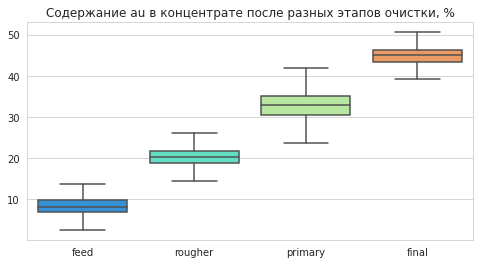

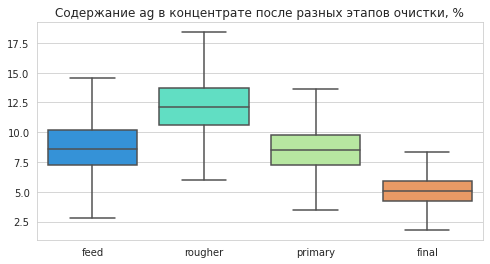

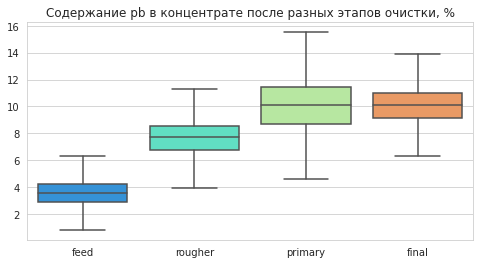

In [23]:
#Построим графики для каждого металла

metalls = ['au', 'ag', 'pb']

for cat in metalls:
    conc(cat)

Вывод   
Из полученных графиков можно сделать следующие выводы:   

Содержание золота в концентрате планомерно растет после каждой очистки. В первичной руде медианной содержание золота меньше 10%, в финальном концентрате около 45%;   
Доля свинца также растет, но его доля в финальном концентрате равна доле после первичной очистки. Видно, что повышение его доли не является целью переработки;   
Концентрация серебра после завершения обработки ниже, чем до ее начала.    

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Хорошо, что выделил отдельную функцию. Отличная визуализация, молодец!
</div>

# 2.2 Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

Для сравнения распределения размеров гранул сырья на обучающей и тестовой выборках сделаем следующее:    

Посчитаем доверительный интервал среднего значения;    
Построим гисторграммы распределения и график-боксплот.    
Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.    

Посчитаем доверительный интервал среднего значения.    

In [24]:
def dov_mean(data):
    print("Cреднее:", data.mean())

    confidence_interval = st.t.interval(0.99, len(data)-1, 
                                    data.mean(), 
                                    data.sem())

    print("99%-ый доверительный интервал:", confidence_interval)

In [25]:
dov_mean(gr_train['rougher.input.feed_size'])

Cреднее: 60.23985599255732
99%-ый доверительный интервал: (59.74161336255205, 60.73809862256258)


In [26]:
dov_mean(gr_test['rougher.input.feed_size'])

Cреднее: 55.93753506406803
99%-ый доверительный интервал: (55.1709416247278, 56.704128503408256)


Средние значения лежат достаточно близко, но доверительные интервалы не пересекаются, что может быть признаком сильного различия размеров граныл сырья. Дл того, чтобы сделать итоговый вывод посмотрим на их распределение.

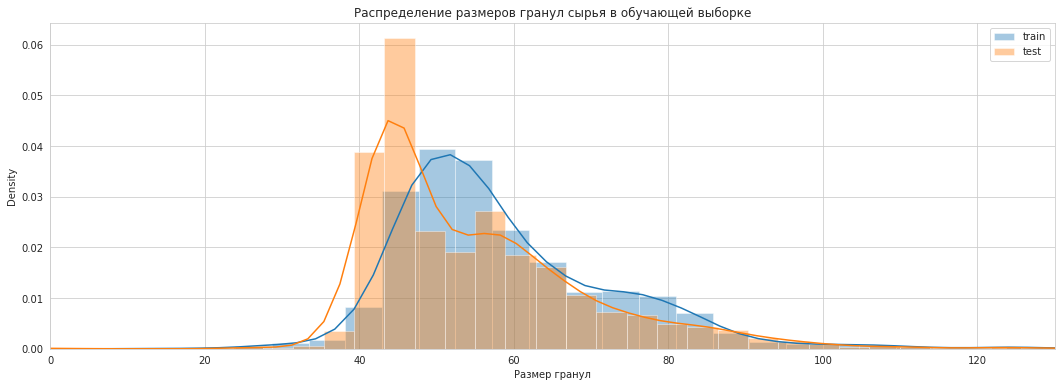

In [27]:
plt.subplots(1, 1, figsize=(18, 6))

plt.title('Распределение размеров гранул сырья в обучающей выборке')
plt.xlim(0,130)

sns.distplot(gr_train['rougher.input.feed_size'], kde=True, bins=100, label="train")
sns.distplot(gr_test_full['rougher.input.feed_size'], kde=True, bins=100, label="test")

plt.xlabel('Размер гранул')
plt.legend()
plt.show()

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Очень наглядно, молодец)
</div>


Распределение в обеих выборках нормлаьное, в тестовой выборке скошенность данных влево чуть сильнее, но в целом распределения похожи.

Посторим графики bpxplot.

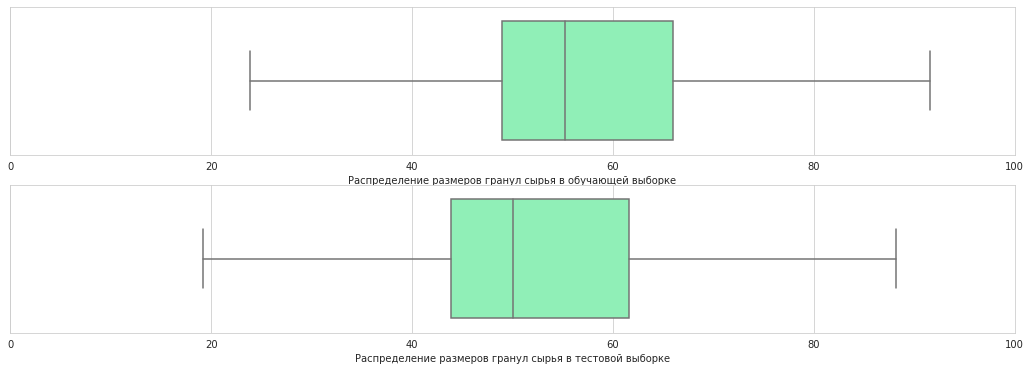

In [28]:
fig, axes = plt.subplots(2, 1, figsize=(18, 6))

axes[0].set_xlim(0,100)
sns.boxplot(data=gr_train, x='rougher.input.feed_size', palette='rainbow', showfliers=False, ax=axes[0])
axes[0].set_xlabel('Распределение размеров гранул сырья в обучающей выборке')

axes[1].set_xlim(0,100)
sns.boxplot(data=gr_test, x='rougher.input.feed_size', palette='rainbow', showfliers=False, ax=axes[1])
axes[1].set_xlabel('Распределение размеров гранул сырья в тестовой выборке')
plt.show()


Несмотря на то, что средние значения размеров гранул разные, параметеры их распределения в обучающей и тренировочной выборках практически идентичны.

Распределения размеров гранул сырья различаются, но не очень сильно - в целом, их распределения похожи.
Дальнейшее обучения модели можно производить на имеющихся данных.

# 2.3 Исследование суммарной концентрация всех веществ на разных стадиях

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.
Для этого суммируем данные о содержании золота(au), серебра(ag), свинца(pb) и известь(sol) в сырье, в черновом и финальном концентратах.

In [29]:
def sum_conc(data):
    data['rougher.input.feed_sum'] = (
    data['rougher.input.feed_ag'] + data['rougher.input.feed_au']
    + data['rougher.input.feed_sol'] + data['rougher.input.feed_pb']
)   
    
    data['rougher.output.concentrate_sum'] = (
    data['rougher.output.concentrate_ag'] + data['rougher.output.concentrate_au']
    + data['rougher.output.concentrate_sol'] + data['rougher.output.concentrate_pb']
) 
    
    data['final.output.concentrate_sum'] = (
    data['final.output.concentrate_ag'] + data['final.output.concentrate_au']
    + data['final.output.concentrate_sol'] + data['final.output.concentrate_pb']
)

In [30]:
sum_conc(gr_full)
gr_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.feed_sum,rougher.output.concentrate_sum,final.output.concentrate_sum
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,51.680034,66.424950,63.644396
1,2016-01-15 01:00:00,6.029369,9.968944,5

In [31]:
def graph_conc(data):
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))

    axes[0, 0].set_title('Сырье')
    axes[0, 0].set_ylim(0,100)
    sns.boxplot(y = 'rougher.input.feed_sum', data=data, palette='rainbow', ax = axes[0, 0])
    axes[0, 0].set_ylabel('Концентрация')
    
    axes[0, 1].set_title('Полуфабрикат')
    axes[0, 1].set_ylim(0,100)
    sns.boxplot(y = 'rougher.output.concentrate_sum', data=data, palette='rainbow', ax = axes[0, 1])
    axes[0, 1].set_ylabel('Концентрация')
    
    axes[0, 2].set_title('Финальный раствор')
    axes[0, 2].set_ylim(0,100)
    sns.boxplot(y = 'final.output.concentrate_sum', data=data, palette='rainbow', ax = axes[0, 2])
    axes[0, 2].set_ylabel('Концентрация')
    
    axes[1, 0].set_title('Сырье')
    sns.distplot(data['rougher.input.feed_sum'], kde=False, bins=50, ax = axes[1, 0])
    axes[1, 0].set_xlabel('Концентрация')
        
    axes[1, 1].set_title('Полуфабрикат')
    sns.distplot(data['rougher.output.concentrate_sum'], kde=False, bins=50, ax = axes[1, 1])
    axes[1, 1].set_xlabel('Концентрация')
    
    axes[1, 2].set_title('Финальный раствор')
    sns.distplot(data['final.output.concentrate_sum'], kde=False, bins=50, ax = axes[1, 2])
    axes[1, 2].set_xlabel('Концентрация')
    
    plt.show()

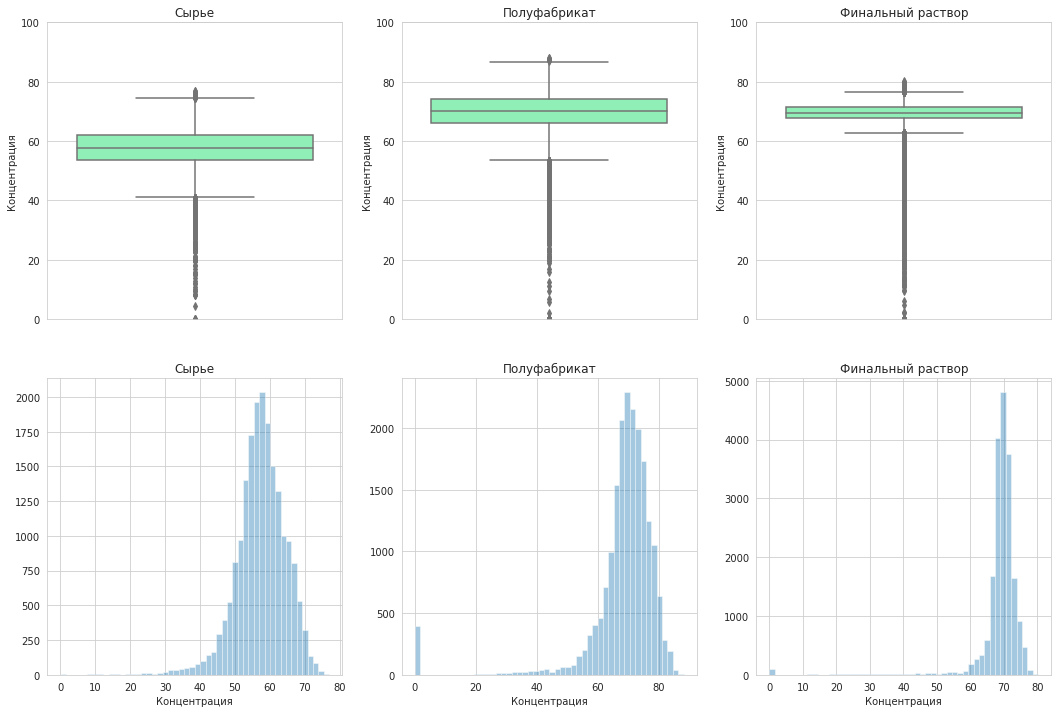

In [32]:
graph_conc(gr_full)

В суммарном распределении видим большое количество выбросов.
Основное количество находится ниже нижнего уса графика на каждой стадии производства.

In [33]:
# Удалим выбросы в полной выборке
gr_full_good = (
    gr_full[(gr_full['rougher.input.feed_sum'] > gr_full['rougher.input.feed_sum'].quantile(0.01))&
           (gr_full['rougher.output.concentrate_sum'] > gr_full['rougher.output.concentrate_sum'].quantile(0.01))&
           (gr_full['final.output.concentrate_sum'] > gr_full['final.output.concentrate_sum'].quantile(0.01))]
)

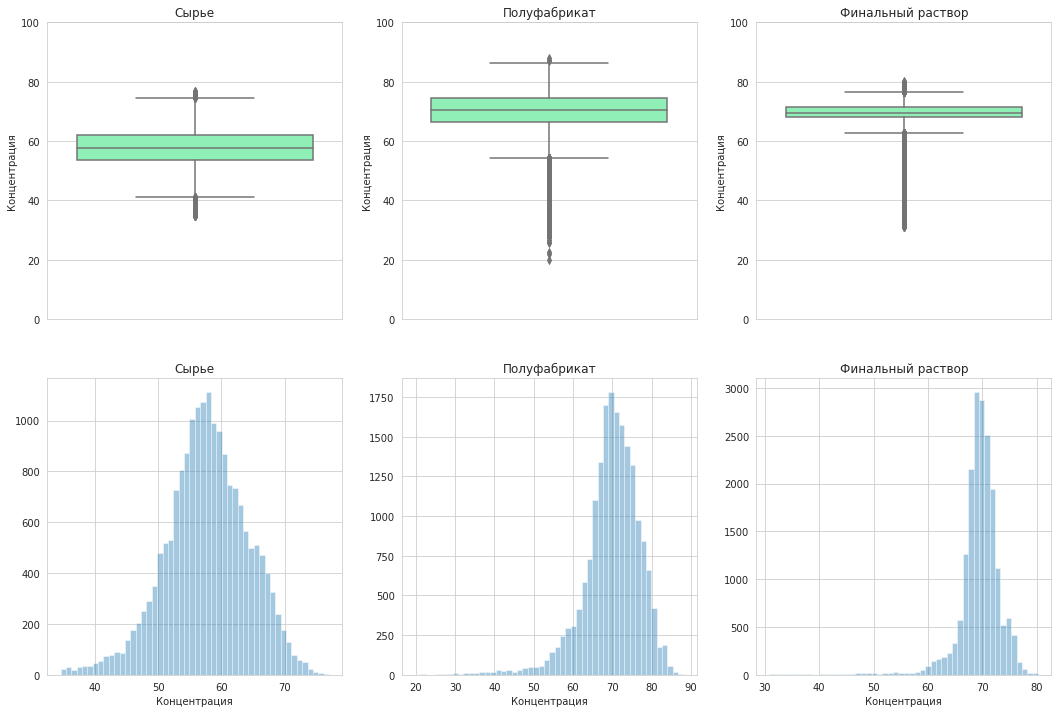

In [34]:
graph_conc(gr_full_good)

In [35]:
#Удалим из обучающей и тестовой выборки удаленные из полной выборки объекты.
#Создадим список с данными полной выборки
gr_full_good_dates = list(gr_full_good['date'])
#Создадим столбцы с указанием присутствия даты объекта в полной выборке
gr_train.loc[gr_train['date'].isin(gr_full_good_dates), 'index'] = 1
gr_train.loc[~gr_train['date'].isin(gr_full_good_dates), 'index'] = 0
gr_test_full.loc[gr_test_full['date'].isin(gr_full_good_dates), 'index'] = 1
gr_test_full.loc[~gr_test_full['date'].isin(gr_full_good_dates), 'index'] = 0
#Удалим отсутвующие объекты
gr_train_good = gr_train[gr_train['index'] == 1]
gr_test_good = gr_test_full[gr_test_full['index'] == 1]
gr_test_good = gr_test_good.fillna(method='ffill')
print(gr_train_good.shape)
print(gr_test_good.shape)

(13603, 88)
(5097, 56)


В суммарном распределении всех веществ на разных стадиях много выбросов, которые могут повлиять на дальнейшие модели предсказания.
Все нулевые и около нулевые выбросы были удалены в полной выборке.
Из обучающей и тестовой выборок также были удалены соответствующие объекты.

Вывод по второму этапу: <a name="4"></a>

Посмотрели, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки - концентрация золота планомерно растет. Концентрация серебра в финальном концентрате ниже, чем в сырье. Доля свинца вырастает после первичной очистки, но потом не изменятъется.     
Сравнили распределения размеров гранул сырья на обучающей и тестовой выборках - распределения схожи;      
Исследовали суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах - суммарная концентраци немного растет после первичной обработки сырья. В расчпределении много выбросов. Мы удалили часть из них из всех выборок.    

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Снова огромные плюсы за доп функции и визуализацию. Отличный вывод по 2-ому этапу
</div>

[Назад к оглавлению](#8)

# 3. Модель <a name="5"></a>


На этом этапе выполним следующие шаги:    

Напишите функцию для вычисления итоговой sMAPE;    
Обучим разные модели и оценим их качество кросс-валидацией;    
Выберем лучшую модель и проверим её на тестовой выборке.    

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Хороший план)
</div>

# 3.1. Функция расчета sMAPE


Построим функцию расчета метрики sMAPE - симметричное среднее абсолютное процентное отклонение.
Она похожа на MAE, но выражается не в абсолютных величинах, а в относительных, т.е. одинаково учитывает масштаб и целевого признака, и предсказания.

In [36]:
def smape_np(target, predict):
    target = pd.Series(target)
    predict = pd.Series(predict)
    return ((abs(target-predict)/((abs(target)+abs(predict))/2)).sum(skipna=True)/target.shape[0]*100)

Проверим корректность работы нашей функции.    
Создадим два списка с данными и посчитаем метрику sMAPE для них вручную и с помощью фукнции.    

In [37]:
data_train1 = np.array([1, 1, 3, 3, 0])
data_predict1 = np.array([1, 2, 4, 3, 0])

y = (
    (abs(1 - 1) / ((abs(1) + abs(1)) / 2)) + 
    (abs(1 - 2) / ((abs(1) + abs(2)) / 2)) +
    (abs(3 - 4) / ((abs(3) + abs(4)) / 2)) + 
    (abs(3 - 3) / ((abs(3) + abs(3)) / 2)) 
      )

smape_y = (y / 5) * 100


print('Результат расчета вручную: sMAPE = ', smape_y)
print('Результат расчета функцией: sMAPE = ', smape_np(data_train1, data_predict1))

Результат расчета вручную: sMAPE =  19.047619047619047
Результат расчета функцией: sMAPE =  19.047619047619047


Результаты идентичны, следовательно функция работает верно.

# 3.2 Обучение модели

На этом этапе подготовим данные для обучения различных моделей прогнозирования, обучим модели и выеберем наилушую.

Преобразование категориальных признаков в численные      
Для обучения наших будущих моделей нам необходимо преобразовать столбцы с категориальными данными в количественные.    
В нашей базе данных только один столбец с категориальными данными - date.    

Для прогнозирования величины концентрации золота после обработки руды, нам не нужна информация о времени и дате обработки,     поэтому удалим столбец с данной информацией и выделим целевой признак в отдельные таблицы.    

Также из обучающей выборки удалим столбцы, которые отсутствуют в тестовой выборке.    

In [38]:

features_train_f = gr_train_good.drop(['date', 'index'], axis=1)
features_train_full = features_train_f.drop(mis_columns, axis=1)
target_train_full = gr_train_good[['rougher.output.recovery', 'final.output.recovery']]

features_test = gr_test_good.drop(['date', 'index', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test = gr_test_good[['rougher.output.recovery', 'final.output.recovery']]

In [39]:
print(features_train_full.shape)
print(features_test.shape)

(13603, 52)
(5097, 52)


Масштабирование количественных признаков¶    
Теперь проведем масштабирование количественных признаков с помощью метода __Стандартизация__.    
Стандартизация подразумевает такую предобработку данных, после которой каждый признак имеет среднее 0 и дисперсию 1.    
Предварительно проверим распределение значений признаков в обучающей выборке и создадим функцию стандартизации.    

In [40]:
features_train_full.describe().round(4)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000
mean,134.3298,8.8830,7.3275,0.8862,1607.4086,-488.6165,1608.1245,-489.0200,1608.4333,-489.4193,1540.5266,-483.3985,8.6038,3.5168,477.1609,59.9821,36.5292,7.8883,11.7347,5.8922,11.3791,5.8444,1123.7753,-370.4779,1322.9125,-464.3105,1301.8974,-465.1249,1212.9559,-465.5468,1085.8858,-464.9789,1037.0205,-464.7204,29.7302,-501.8343,24.9305,-503.2590,29.2794,-478.0589,22.6850,-488.7536,20.0277,-478.4224,15.5243,-460.7143,16.8358,-483.8491,13.1145,-483.8427,19.6680,-506.7966
std,38.8093,3.3608,0.6133,0.3754,129.0019,35.8679,131.8328,33.7163,134.0256,35.6034,279.5520,46.1431,1.8602,1.0815,100.9724,21.5924,4.4376,1.8934,3.2075,1.0668,3.6736,1.2053,168.7385,94.3128,181.8232,57.1679,212.0491,55.6121,208.7472,55.3996,186.3463,56.3367,175.0171,56.3598,5.7930,59.4818,6.0056,62.2931,5.6490,54.6250,5.0028,42.0313,5.6916,50.4638,5.2713,58.2779,5.8373,38.1236,5.7879,38.7713,5.7327,36.6889
min,0.0031,0.0000,1.0800,0.0000,0.0064,-798.6417,0.0087,-740.1221,0.0152,-799.8031,0.0087,-799.7886,3.4665,0.0886,0.0128,9.6596,13.6245,0.5882,0.0012,0.0014,0.0002,0.0003,-0.0411,-650.2029,-0.6534,-650.2600,-0.0351,-640.9956,-0.5543,-640.5190,-1.9703,-649.4439,-2.4306,-649.8810,0.0775,-799.6064,0.0000,-799.8739,0.0000,-799.6130,0.0000,-759.1774,0.0000,-799.7068,0.0000,-799.8608,-0.3721,-797.1425,0.6462,-800.0062,0.1953,-809.3987
25%,108.3999,6.0463,6.9600,0.6087,1594.8006,-500.2841,1552.8278,-500.3734,1548.9466,-500.5951,1451.3183,-500.4535,7.1401,2.7770,428.2613,48.9946,34.1851,6.6089,9.8664,5.1984,9.5411,5.1478,999.7955,-499.8028,1199.4759,-500.1824,1103

Средние значения каждого признака больше 0, значения дисперсии так же не равны 1.

In [41]:
def scalers(train, test):
    numeric = train.columns
    scaler = StandardScaler()
    scaler.fit(train[numeric])
    train[numeric] = scaler.transform(train[numeric])
    test[numeric] = scaler.transform(test[numeric])

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Очень хорошо, что сделал стандартизацию правильно)
</div>

In [42]:
scalers(features_train_full, features_test)

In [43]:
features_train_full.describe().round(4)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000,13603.0000
mean,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-3.4613,-2.6432,-10.1876,-2.3604,-12.4608,-8.6438,-12.1986,-7.4478,-12.0013,-8.7181,-5.5109,-6.8570,-2.7617,-3.1701,-4.7257,-2.3306,-5.1617,-3.8558,-3.6584,-5.5219,-3.0976,-4.8488,-6.6604,-2.9660,-7.2797,-3.2528,-6.1400,-3.1626,-5.8135,-3.1585,-5.8380,-3.2745,-5.9394,-3.2855,-5.1189,-5.0063,-4.1513,-4.7618,-5.1833,-5.8868,-4.5346,-6.4341,-3.5190,-6.3669,-2.9452,-5.8197,-2.9480,-8.2181,-2.1543,-8.1549,-3.3969,-8.2481
25%,-0.6682,-0.8441,-0.5993,-0.7392,-0.0977,-0.3253,-0.4195,-0.3367,-0.4439,-0.3139,-0.3191,-0.3696,-0.7868,-0.6841,-0.4843,-0.5089,-0.5283,-0.6758,-0.5825,-0.6503,-0.5003,-0.5779,-0.7348,-1.3713,-0.6789,-0.6275,-0.9351,-0.6309,-0.7258,-0.6283,-0.7207,-0.6260,-0.7750,-0.6343,-0.7970,0.0267,-0.4774,0.0481,-0.7592,-0.4049,-0.5494,-0.2702,-0.8849,-0.4400,-0.6860,-0

Средние значения всех признаков равны 0, дисперсия всех признаков равна 1.
Стандартизаиця прошла успешно.

Также создадим обучающую выборку для прогноза значений целевого признака __rougher.output.recovery__

In [44]:
features_train_columns = features_train_full.columns
col_rougher = [v for v in features_train_columns if 'rougher' in v]
features_train_rougher = features_train_full[col_rougher]
features_test_rougher = features_test[col_rougher]
features_test_rougher

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level
0,2.432470,1.960344,0.125115,0.126362,1.237928,2.216146,1.617581,0.244966,1.494052,0.254177,-0.722600,0.213941,-0.402460,1.140594,-0.245928,1.181948,-0.070269,1.192439,-0.463742,1.161772,-0.499709,1.180666
1,2.382857,1.858029,0.128194,0.091659,1.049859,2.128929,1.642416,0.100198,1.529044,0.131055,-0.741320,0.212622,-0.409848,1.125926,-0.247041,1.177738,-0.059641,1.184246,-0.460899,1.162472,-0.496087,1.045694
2,2.437761,1.766016,0.123375,0.320574,1.355981,2.219964,1.639295,-0.038922,1.525242,0.007661,-0.742351,0.219431,-0.415099,1.120358,-0.253206,1.151779,-0.063169,1.168936,-0.461310,1.166990,-0.495399,1.133050
3,2.041075,1.477689,-0.005376,-0.005380,1.021080,2.267641,1.495756,-0.084570,1.398164,-0.033771,-0.731921,0.215306,-0.393748,1.148505,-0.242423,1.175654,-0.064948,1.228280,-0.450549,1.145678,-0.493028,1.151883
4,1.464205,1.156467,0.109808,0.154376,1.068171,1.796939,0.583820,-0.144427,0.618191,-0.086890,-0.754059,0.211171,-0.100396,1.133527,0.021496,1.188171,0.171235,1.167378,-0.145147,1.171405,-0.499256,1.161204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,1.631687,1.089817,0.440971,0.313844,1.237834,1.408259,-0.506824,1.229659,-0.345270,1.123254,1.636675,0.747310,-1.503002,-0.625627,-1.650497,-0.620821,-1.727600,-0.594207,-1.258182,-0.626731,-1.060274,-0.621303
5852,1.469937,0.889223,0.525261,0.119426,1.029233,1.249543,-0.547262,1.226810,-0.381186,1.126395,1.673343,0.757303,-1.469599,-0.593708,-1.627264,-0.580453,-1.712992,-0.544353,-1.254777,-0.611770,-1.061030,-0.565307
5853,1.441885,0.821670,0.684826,0.632904,1.029033,1.204671,-0.484056,1.222460,-0.324943,1.123673,1.614556,0.745071,-1.512694,-0.617394,-1.664459,-0.619037,-1.708494,-0.623652,-1.262594,-0.612319,-1.067026,-0.599527
5854,1.443929,0.764487,0.694973,0.837563,1.168811,1.152942,-0.312980,1.226025,-0.177702,1.125464,1.660423,0.746986,-1.502120,-0.620741,-1.655942,-0.633873,-1.750070,-0.620487,-1.269042,-0.628416,-1.068195,-0.634480


Обучение модели   
В данном исследовании перед нами стоит задача регрессии, т.е. нахождение величины количественого признака.   
Создадим функцию прогнозирования доли золота в концентратах на разных стадиях очистки.   
С помощью кросс-валидации получим 5 результатов метрики sMAPE для каждой модели и найдем среднне значение.    

<div class="alert alert-block alert-info">Комментарий студента-понял, изменил)</div> <a name="9"></a>

In [45]:
def ml_model(ML, ftr, ftf, tt):

    smape_scorer = make_scorer(smape_np, greater_is_better=True)

    cross_val_score_rougher = cross_val_score(ML, ftr, tt['rougher.output.recovery'], cv=2,
                                          scoring = smape_scorer).mean()
    cross_val_score_final = cross_val_score(ML, ftf, tt['final.output.recovery'], cv=2,
                                        scoring = smape_scorer).mean()

    smape_total =  0.25*cross_val_score_rougher + 0.75*cross_val_score_final

    print('smape_total =', smape_total)

<div class="alert alert-danger">
    
**Комментарий ревьюера**

Алексей, у нас метрика измеряется в процентах. Как в таком случае мы могли получить отрицательное число? Прошу рассмотреть и исправить, если не получится пиши вопросы, разбремся вместе)
    
P.S. Если я что-то не заметил, и ты хотел бы это обсудить, тоже пиши)
</div>

Построим прогноз с помощью модели __Линейной регрессии__

In [46]:
ml_model(LinearRegression(), features_train_rougher, features_train_full, target_train_full)

smape_total = 5.034500505046924


Построим прогноз с помощью модели __Дерево решений__

In [47]:
ml_model(DecisionTreeRegressor(random_state=12345), features_train_rougher, features_train_full, target_train_full)

smape_total = 6.593701794129793


Построим прогноз с помощью модели __Случайный лес__

In [48]:
ml_model(RandomForestRegressor(random_state=12345), 
         features_train_rougher, features_train_full, target_train_full)

smape_total = 4.763322536167196


На предварительном этапе наилучший результат показала модель - Случайный лес;

На следующем этапе попробуем подобрать гиперпараметры этой модели и выбрать наилучшие.

# 3.2. Подбор значений гиперпараметров

In [49]:
#Построим модель Случайный лес и проверим результаты прогнозирования при разных количествах деревьев.

for estimator in range(10, 52, 10):
    print('n_estimators:', estimator)
    ml_model(RandomForestRegressor(n_estimators=estimator, random_state=12345), 
         features_train_rougher, features_train_full, target_train_full)

n_estimators: 10
smape_total = 4.763322536167196
n_estimators: 20
smape_total = 4.6357038019579235
n_estimators: 30
smape_total = 4.620180106610309
n_estimators: 40
smape_total = 4.5727142663716345
n_estimators: 50
smape_total = 4.558887138753584


Наилучший результат при 50 деревьях, sMAPE равен: 4.57712409498757

Теперь проверим при какой глубине дерева будет получен наилучший результат.

In [50]:
for depth in range(1, 8):
    print('max_depth:', depth)
    ml_model(RandomForestRegressor(n_estimators=50, max_depth=depth, random_state=12345), 
         features_train_rougher, features_train_full, target_train_full)

max_depth: 1
smape_total = 4.295758065091285
max_depth: 2
smape_total = 4.273723692584988
max_depth: 3
smape_total = 4.280017769568265
max_depth: 4
smape_total = 4.336539299499634
max_depth: 5
smape_total = 4.366621006279075
max_depth: 6
smape_total = 4.344280665082576
max_depth: 7
smape_total = 4.378174746559612


Наилучший результат при глубине равной 2, sMAPE равен 4.273723692584988

Выберем оптимальное количество max_features

In [51]:
for features in range(1, 5):
    print('max_features:', features)
    ml_model(RandomForestRegressor(n_estimators=50, max_depth=2, max_features=features, random_state=12345), 
         features_train_rougher, features_train_full, target_train_full)

max_features: 1
smape_total = 3.834075959902477
max_features: 2
smape_total = 3.8421764057487993
max_features: 3
smape_total = 3.933683396268586
max_features: 4
smape_total = 3.9430182684617088


Наилучший результат при max_features равном 4 , sMAPE равен 3.943018268461709

Моделью с наилучшими результатами стала модель __Случайный лес__ с глубиной деревьев 2, количеством деревьев 40, показателем max_features 4. 

# 3.3 Проверка модели на тестовой выборке

Проверим модель на тестовой выборке

In [52]:
rfr_rougher = RandomForestRegressor(n_estimators=50, max_depth=2, max_features=17, random_state=12345)
rfr_final = RandomForestRegressor(n_estimators=50, max_depth=2, max_features=17, random_state=12345)

rfr_rougher.fit(features_train_rougher, target_train_full)
rfr_final.fit(features_train_full, target_train_full)

predictions_test_rougher = rfr_rougher.predict(features_test_rougher)
predicted_test_rougher = pd.DataFrame(predictions_test_rougher)

predictions_test_final = rfr_final.predict(features_test)
predicted_test_final = pd.DataFrame(predictions_test_final)
    
smape_rougher = smape_np(target_test['rougher.output.recovery'], predicted_test_rougher[0])
smape_final = smape_np(target_test['final.output.recovery'], predicted_test_final[1])

smape_total = 0.25*smape_rougher + 0.75*smape_final

print('smape_total =', smape_total)

smape_total = 5.990053579509692



Проверка модели на адекватность

Заполнение таргетов средним

In [53]:
dummy_regr = DummyRegressor(strategy='mean')
dummy_regr.fit(features_train_full, target_train_full)

target_pred = dummy_regr.predict(target_test)
target_pred_df = pd.DataFrame(target_pred)

smape_rougher_dummy = smape_np(target_pred_df[0], target_test['rougher.output.recovery'])
smape_final_dummy = smape_np(target_pred_df[1], target_test['final.output.recovery'])

smape_total = 0.25*smape_rougher_dummy + 0.75*smape_final_dummy
smape_total

6.262745616562704

Вывод  <a name="6"></a>  
Модель прошла проверку на адекватность. Можно начинать запуск в работу и после получения первых результатов начинать процесс доработки.    



[Назад к оглавлению](#8)

# Общий вывод <a name="7"></a>


В данном проекте были изучены данные золотодобывающей компании, в которых была информация о всех стадиях переработки золотосодержащей руды и разработана модель предсказывающая коэффициент восстановления золота из золотосодержащей руды.    

Что мы сделали:   

Подготовка данных:        
Загружены и первично изучены файлы - 3 выборки, обучающая, тестовая, полная.       
Проверен расчет эффективности обогащения. MAE между данной и вычисленной обучающей выборке для признака rougher.output.recovery равно нулю;      
Проанализировали признаки, недоступные в тестовой выборке; В тестовой выборке остутствуют параметры, которые можно узнать только после прохождения всех стадий производства:    
Проведена предобработка данных - удалены пропущенные значения в целевых признаках и заполнены пропуски в остальных методом ffil.   
Изучено изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки.    
Концентрация золота планомерно растет. Концентрация серебра в финальном концентрате ниже, чем в сырье. Доля свинца вырастает после первичной очистки, но потом не изменятъется.    
Проведено сравнение распределения размеров гранул сырья на обучающей и тестовой выборках - распределения схожи;    
Исследованы суммарные концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.   
Суммарная концентраци немного растет после первичной обработки сырья. Удалены часть выбросов из всех выборок.   
Подготовлены данные для прогнозирования - проведено масштабирование, из обучающей выборки удалены столбцы, отсутствующие в тестовой;   
Проведено предварительное обучение моделей. Найлушей моделью оказался - Случайный лес;    
Подобраны Гиперпараметры модели;   
Произведено прогнозирование на тестовой выборке. Полученные результаты лучше, чем на обучающей;        
Произведена провекра модели на адекватность - модель ее не прошла. Заполнение целевых признаков средними значениями оказалось более хорошей стратегией с меньшеим sMAPE.

[Назад к оглавлению](#8)

- [x]  Jupyter Notebook открыт
- [x ]  Весь код выполняется без ошибок
- [x ]  Ячейки с кодом расположены в порядке выполнения
- [x ]  Выполнен шаг 1: данные подготовлены
    - [x ]  Проверена формула вычисления эффективности обогащения
    - [x ]  Проанализированы признаки, недоступные в тестовой выборке
    - [x ]  Проведена предобработка данных
- [x ]  Выполнен шаг 2: данные проанализированы
    - [x ]  Исследовано изменение концентрации элементов на каждом этапе
    - [x ]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x ]  Исследованы суммарные концентрации
    - [x ]  Проанализированы и обработаны аномальные значения
- [x ]  Выполнен шаг 3: построена модель прогнозирования
    - [x ]  Написана функция для вычисления итогового *sMAPE*
    - [x ]  Обучено и проверено несколько моделей
    - [x ]  Выбрана лучшая модель, её качество проверено на тестовой выборке

<div class="alert alert-success">
    
**Комментарий ревьюера v_2**
    
Вот теперь молодец)Спасибо за исправления) У тебя получилась хорошая работа) Единственное, есть подозрение на переобучение, если будет интересно проверь)Успехов в дальнейшей учебе)
</div>